In [1]:
## for plotting SSH / ocean color underway with ship track 

In [2]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from os import listdir
import glob
import os
import pandas as pd
import imageio
import scipy
from netCDF4 import Dataset
import datetime as dt
import cartopy.crs as ccrs

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy
import earthaccess
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
import os
import netCDF4 
import fnmatch


from matplotlib.animation import FuncAnimation, PillowWriter  
import matplotlib.colors as mcolors

## using Mati Kahru's generated data: 


In [3]:
path = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/data/Kahru_composites/'
os.listdir(path)

['Chl5day1km',
 'Chl15day1km',
 'ChlMo500m',
 'cal_aco_3840_Latitude_Longitude.hdf',
 'ChlMo1km',
 'Chlday1km']

In [4]:
path = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/data/Kahru_composites/'
products = ['Chl5day1km', 'Chl15day1km', 'ChlMo500m', 'ChlMo1km', 'Chlday1km']
files = os.listdir(path+products[0]+'/')
files

['C20250212025025_chl_comp_mapped.png',
 'C20250312025035_chl_comp_mapped.hdf',
 'C20250012025005_chl_comp_mapped.hdf',
 'C20250512025055_chl_comp_mapped.hdf',
 'C20250262025030_chl_comp_mapped.hdf',
 'C20250062025010_chl_comp_mapped.hdf',
 'C20250712025072_chl_comp_mapped.png',
 'C20250562025060_chl_comp_mapped.hdf',
 'C20250612025065_chl_comp_mapped.png',
 'C20250312025035_chl_comp_mapped.png',
 'C20250612025065_chl_comp_mapped.hdf',
 'C20250262025030_chl_comp_mapped.png',
 'C20250162025020_chl_comp_mapped.png',
 'C20250362025040_chl_comp_mapped.png',
 'C20250412025045_chl_comp_mapped.png',
 'C20250462025050_chl_comp_mapped.hdf',
 'C20250562025060_chl_comp_mapped.png',
 'C20250012025005_chl_comp_mapped.png',
 'C20250512025055_chl_comp_mapped.png',
 'C20250062025010_chl_comp_mapped.png',
 'C20250712025072_chl_comp_mapped.hdf',
 'C20250662025070_chl_comp_mapped.png',
 'C20250162025020_chl_comp_mapped.hdf',
 'C20250462025050_chl_comp_mapped.png',
 'C20250362025040_chl_comp_mapped.hdf',


In [5]:
product = files[1]
filename = path+products[0]+'/'+product
filename

'/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/data/Kahru_composites/Chl5day1km/C20250312025035_chl_comp_mapped.hdf'

In [6]:

#df = pd.read_hdf(new_fn)
#print(df.head())

## mati's satellite files are HDF4 (not HDF5) - so you need to use package pyhdf 
if you need to open hdf5 files, you can use pandas: 

pd.read_hdf()

or you can useh5py: 

with h5py.File(product_of_interest, 'r') as f:
    print("Keys: ", list(f.keys()))
    data = f['some_dataset_name'][:]
    print(data)

But we will use pyhdf:

In [53]:
import pyhdf.SD as phs
#from pyhdf.SD import SD, SDC

# product of interest: 15 day composite from Feb 15 (DOY = 46) to March 1 (DOY = 60) 

path = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/data/Kahru_composites/'
fn = 'C20250462025060_chl_comp.hdf'

f = phs.SD(path+fn, phs.SDC.READ)

print(f.datasets()) 
chl = f.select('Chl') 
data = chl[:,:].astype(float)
data.shape



{'Chl': (('fakeDim0', 'fakeDim1'), (3405, 3840), 20, 0)}


(3405, 3840)

In [54]:
# also check out the mapping file 
fn = 'cal_aco_3840_Latitude_Longitude.hdf'
hmap = path+fn

f = phs.SD(hmap, phs.SDC.READ)

print(f.datasets()) 
variables = f.datasets()
print(variables)
lat_name = list(variables.keys())[0]
lon_name = list(variables.keys())[1]

lons = f.select(lon_name) 
lats = f.select(lat_name) 
lon = lons[:,:]; lat = lats[:,:]



{'Latitude': (('fakeDim0', 'fakeDim1'), (3405, 3840), 5, 0), 'Longitude': (('fakeDim2', 'fakeDim3'), (3405, 3840), 5, 1)}
{'Latitude': (('fakeDim0', 'fakeDim1'), (3405, 3840), 5, 0), 'Longitude': (('fakeDim2', 'fakeDim3'), (3405, 3840), 5, 1)}


/tmp/ipykernel_69255/3290626951.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon,lat,data)


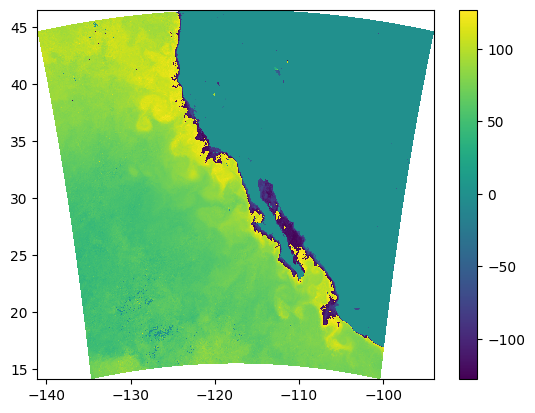

In [18]:
# plot them mapped 

plt.figure()
plt.pcolormesh(lon,lat,data)
plt.colorbar()
plt.show()


In [19]:
print(np.nanmin(data))
print(np.nanmax(data))

-128.0
127.0


/tmp/ipykernel_69255/1481009157.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon,lat,data)


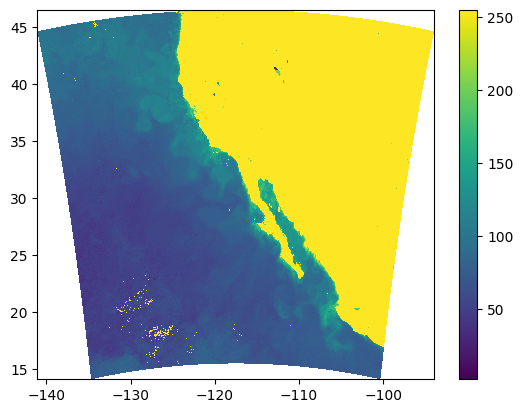

/tmp/ipykernel_69255/1481009157.py:20: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon,lat,data)


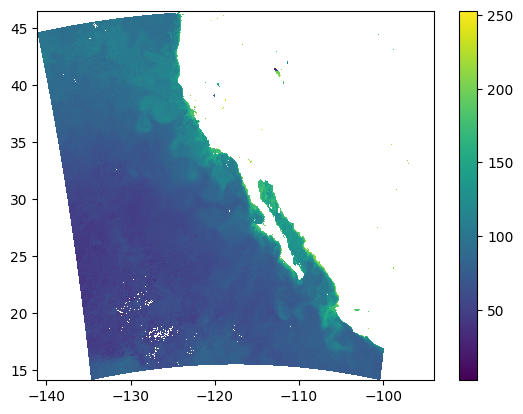

/tmp/ipykernel_69255/1481009157.py:34: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon,lat,logchl)


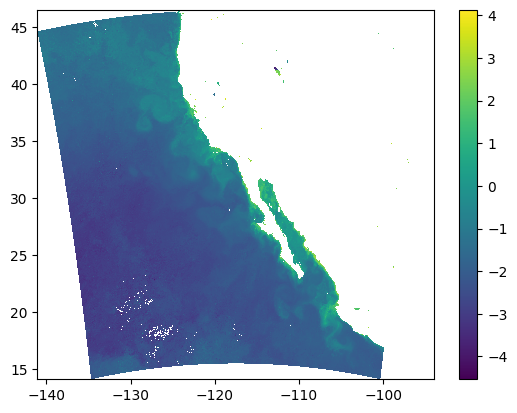

In [20]:
# okay, so process according to mati's explanation: https://spg-satdata.ucsd.edu/Readme.htm

# when reading with Matlab the unsigned byte variable is reported as signed byte (int8) and values over 128 become negative. A simple fix is to add 256 if the signed pixel value is negative.

data[data<0] += 256


plt.figure()
plt.pcolormesh(lon,lat,data)
plt.colorbar()
plt.show()


# Pixel values 0 and 255 (and the corresponding scaled values) are considered invalid and must be excluded in any statistics.

data[data==0] = np.nan
data[data==255] = np.nan

plt.figure()
plt.pcolormesh(lon,lat,data)
plt.colorbar()
plt.show()

# sst & chl in hdf use 1 byte per pixel with specific scaling. Linear scaling is used for SST and logarithmic scaling for Chl. The scaling equations using pixel value (PV) as unsigned byte (from 0 to 255) are:
# SST (deg C) = 0.15 * PV - 3.0
# Chl (mg m-3) = 10^(0.015 * PV - 2.0), i.e. 10 to the power of 0.015 * PV - 2.0.

power = 0.015*data - 2.0
chl = np.power(10,power)
logchl = np.log(chl)


plt.figure()
plt.pcolormesh(lon,lat,logchl)
plt.colorbar()
plt.show()



/tmp/ipykernel_69255/2145660919.py:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax.pcolormesh(lon, lat, logchl, vmin=chl_extent[0], vmax=chl_extent[1]) #, cmap="jet"


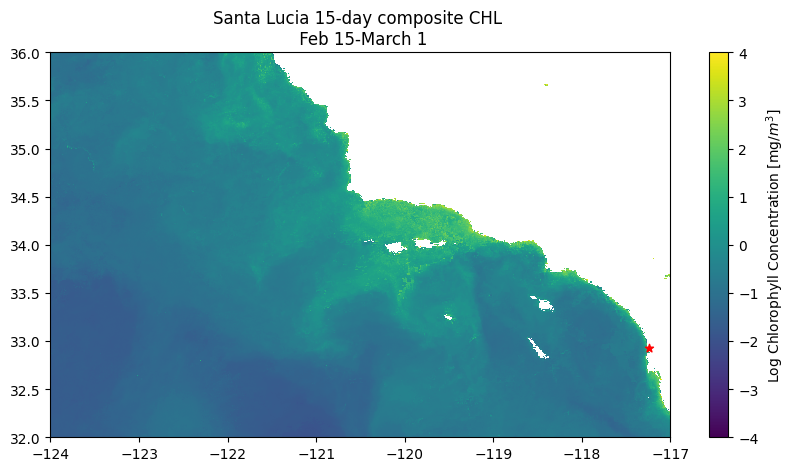

In [23]:
# now limit to region of interest: 

title = 'Santa Lucia 15-day composite CHL \n Feb 15-March 1'

# now perform for each day satellite file that i have 

# set bounds
xmin, xmax = -124, -117
ymin, ymax = 32, 36
sdlonlat = [-117.24556, 32.928333]
chl_extent = [-4, 4]



fig, ax = plt.subplots(figsize=(10, 5))
mesh = ax.pcolormesh(lon, lat, logchl, vmin=chl_extent[0], vmax=chl_extent[1]) #, cmap="jet"
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_title(title)

# log scale plot: 
# change mins: 
#chl_extent = [1e-2, 3]
#mesh = ax.pcolormesh(lon,lat,chl_data[0],cmap='jet',transform=crs_data,norm=mcolors.LogNorm(vmin=chl_extent[0],vmax=chl_extent[1]) )
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label(r'Log Chlorophyll Concentration [mg/$m^3$]')

# reference SD 
ax.scatter(sdlonlat[0], sdlonlat[1], color="red", marker="*", label="SD")

plt.show()





### Access ship data from cruise drive


In [55]:
# location of cruise folder on my local computer 
shipinfo = '/home/vboatwright/mnt/cruise/SR2503/metacq/data/'
shipinfo = '/media/vboatwright/KBZ/SR2503_cruise/metacq/data/'

seadates = [dt.datetime(2025,2,19),dt.datetime(2025,2,20),dt.datetime(2025,2,21),dt.datetime(2025,2,22),dt.datetime(2025,2,23),dt.datetime(2025,2,24),dt.datetime(2025,2,25)]
longdays = [sd.strftime("%Y%m%d") for sd in seadates]
days = [sd.strftime("%y%m%d") for sd in seadates]
time = [int(dd) for dd in longdays]

NN = len(days) 
slons = []
slats = []

for ii in np.arange(0,NN): 
    shipdata = np.loadtxt(shipinfo+days[ii]+'.MET',usecols=(0,24,25))
    if shipdata[1,2]>0 or shipdata[1,2]<-100:
        shipdata=np.loadtxt(shipinfo+days[ii]+'.MET',usecols=(0,24,25))
    metatime=min(shipdata[:,0], key=lambda x:abs(x-time[ii]))
    subset=shipdata[shipdata[:,0]==metatime,:]
    shiplat,shiplon=subset[0,1:3]
    slons.append(shiplon)
    slats.append(shiplat)


In [65]:
# actually - use each station instead 

path = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/SR2503_scienceshare/CTD/Survey_Stations/'
files = os.listdir(path)


def parse_cnv_file(filename):
    """Parse a Sea-Bird .cnv file into metadata and data."""
    metadata = {}
    data = []

    with open(filename, 'r') as file:
        for line in file:
            # Check for metadata (lines starting with '*')
            if line.startswith('*'):
                if '=' in line:
                    # Metadata key-value pair
                    key, value = line[1:].strip().split('=', 1)
                    metadata[key.strip()] = value.strip()
                else:
                    # Metadata comments without key-value
                    key = line[1:].strip()
                    metadata[key] = None
            elif line.startswith('#'):
                # Column headers start with '#'
                if 'name' in line:
                    _, col_index, col_name = line.strip().split(' ', 2)
                    metadata[f"Column_{col_index.strip()}"] = col_name.strip()
            else:
                # Data starts after metadata and column definitions
                data.append(line.strip())

    # Convert data into a DataFrame
    if data:
        data = [list(map(float, row.split())) for row in data if row]
        df = pd.DataFrame(data, columns=[metadata.get(f"Column_{i}", f"Column_{i}") for i in range(len(data[0]))])
    else:
        df = pd.DataFrame()

    return metadata, df

def convert_to_decimal_degrees(coord_str):
    """
    Converts strings like '33 49.38 N' or '118 37.74 W' to decimal degrees.
    """
    parts = coord_str.split()
    degrees = float(parts[0])
    minutes = float(parts[1])
    direction = parts[2]

    decimal = degrees + minutes / 60.0
    if direction in ['S', 'W']:
        decimal = -decimal
    return decimal
    
def extract_lat_lon_time(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Ensure file has at least 13 lines
    if len(lines) < 13:
        raise ValueError("File does not contain enough lines.")

    # Strip '*' and whitespace, then split at '=' to isolate values
    lat_line = lines[9].strip().lstrip('*').strip()
    lon_line = lines[10].strip().lstrip('*').strip()
    time_line = lines[11].strip().lstrip('*').strip()

    lat_str = lat_line.split('=')[1].strip()
    lon_str = lon_line.split('=')[1].strip()
    utc_str = time_line.split('=')[1].strip()

    # Convert to desired formats
    latitude = convert_to_decimal_degrees(lat_str)
    longitude = convert_to_decimal_degrees(lon_str)
    utc_time = datetime.strptime(utc_str, "%b %d %Y %H:%M:%S")

    return latitude, longitude, utc_time

# find cast files 

matched_files = [f for f in files if fnmatch.fnmatch(f, '*_down.cnv')]

# loop through casts 1-13

stations = np.arange(1,14) 
num_stations = len(stations)

slons = []
slats = []
sdates = []


num_variables = 17
variable_order = ['Temp','Cond','Pressure','Temp2','Cond2','Transmissometer','Fluorometer','Alimeter','PAR','Oxygen','UPV','SPAR','Salinity','Salinity2','Lon','Lat','Flag']
# longest (?) shape of p/t/c object: 212103
deepest = 222873
#stations = [1,5,9,11,7,2,6,10,12,8,4,3];
#cardinallocs = np.array([0,9,5,1,3,7,10,6,2,4,8,12,11]) 
#cardinal = cardinallocs[1:]

survey_data = np.zeros((num_stations,num_variables,deepest))*np.nan


for ii,stat in enumerate(stations): 
    # save lat/lon
    filename = f'SR2503_cast_{stat:02d}_updown.cnv'
    [this_lat, this_lon, this_time] = extract_lat_lon_time(path+filename)
    slons.append(this_lon)
    slats.append(this_lat)
    sdates.append(this_time)

    # save ctd/bio variables
    metadata, data = parse_cnv_file(path+filename)

    # save data with index as each station #
    zlen = len(data['Column_2'].values)
    
    temp1 = data['Column_0'].values
    survey_data[ii,0,0:zlen] = temp1
    
    cond1 = data['Column_1'].values
    survey_data[ii,1,0:zlen] = cond1

    p = data['Column_2'].values
    survey_data[ii,2,0:zlen] = p

    temp2 = data['Column_3'].values
    survey_data[ii,3,0:zlen] = temp2

    cond2 = data['Column_4'].values
    survey_data[ii,4,0:zlen] = cond2
    
    trans = data['Column_5'].values
    survey_data[ii,5,0:zlen] = trans
    
    fluoro = data['Column_6'].values
    survey_data[ii,6,0:zlen] = fluoro
    
    altimeter = data['Column_7'].values
    survey_data[ii,7,0:zlen] = altimeter

    PAR = data['Column_8'].values
    survey_data[ii,8,0:zlen] = PAR
    
    oxygen = data['Column_9'].values
    survey_data[ii,9,0:zlen] = oxygen
    
    upv = data['Column_10'].values
    survey_data[ii,10,0:zlen] = upv
    
    SPAR = data['Column_11'].values
    survey_data[ii,11,0:zlen] = SPAR
    
    sal1 = data['Column_12'].values
    survey_data[ii,12,0:zlen] = sal1
    
    sal2 = data['Column_13'].values
    survey_data[ii,13,0:zlen] = sal2

    print(filename)
  


NN = len(sdates)

SR2503_cast_01_updown.cnv
SR2503_cast_02_updown.cnv
SR2503_cast_03_updown.cnv
SR2503_cast_04_updown.cnv
SR2503_cast_05_updown.cnv
SR2503_cast_06_updown.cnv
SR2503_cast_07_updown.cnv
SR2503_cast_08_updown.cnv
SR2503_cast_09_updown.cnv
SR2503_cast_10_updown.cnv
SR2503_cast_11_updown.cnv
SR2503_cast_12_updown.cnv
SR2503_cast_13_updown.cnv


In [78]:
station_names = [1,5,9,11,7,2,6,10,12,8,4,3];


/tmp/ipykernel_69255/1532058652.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax.pcolormesh(lon, lat, logchl, vmin=chl_extent[0], vmax=chl_extent[1]) #, cmap="jet"


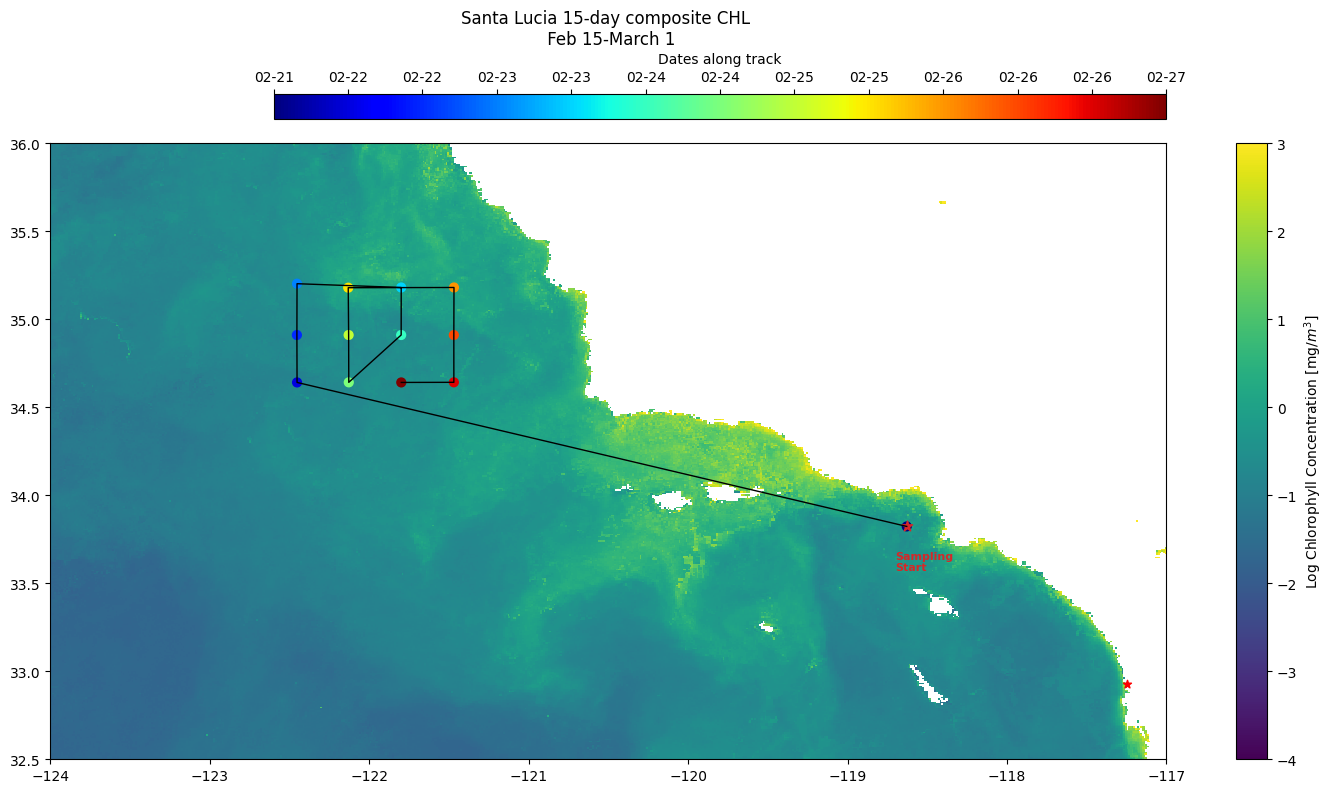

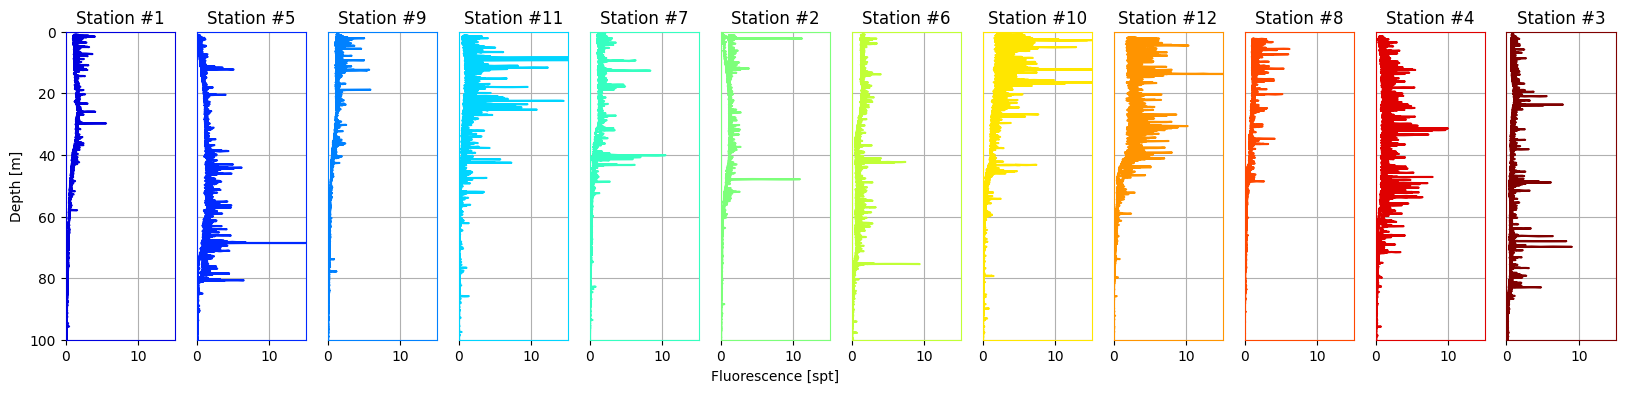

In [88]:
# now limit to region of interest: 
import matplotlib as mpl

title = 'Santa Lucia 15-day composite CHL \n Feb 15-March 1'

# set bounds
xmin, xmax = -124, -117
ymin, ymax = 32.5, 36
sdlonlat = [-117.24556, 32.928333]
chl_extent = [-4,3]

fig, ax = plt.subplots(figsize=(18, 8))
mesh = ax.pcolormesh(lon, lat, logchl, vmin=chl_extent[0], vmax=chl_extent[1]) #, cmap="jet"
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_title(title)

# log scale plot: 
# change mins: 
#chl_extent = [1e-2, 3]
#mesh = ax.pcolormesh(lon,lat,chl_data[0],cmap='jet',transform=crs_data,norm=mcolors.LogNorm(vmin=chl_extent[0],vmax=chl_extent[1]) )
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label(r'Log Chlorophyll Concentration [mg/$m^3$]')


# add ship trajectory
numstops = np.arange(0,NN)
j = ax.plot(slons,slats,linewidth=1,label='Ship Track',color='k')
traj = ax.scatter(slons,slats,c=numstops,s=40,linewidth=1,cmap='jet')

j1 = ax.scatter(slons[0],slats[0],c='tab:red',marker='*',s=60)
ax.annotate('Sampling\nStart',(slons[0]-0.075,slats[0]-0.25),color='tab:red',fontsize=8,fontweight='bold')


# trajectory colorbar
cax1 = ax.inset_axes([0.2, 1.04, 0.8, 0.04]) # [left, bottom, width, height]
trajcbar = fig.colorbar(traj, cax=cax1,orientation='horizontal')
cax1.tick_params(axis='both',which='both',right=True,left=False,labelright=True)
cax1.xaxis.set_ticks_position('top'); cax1.xaxis.set_label_position('top') 
dates = [dt.datetime.strftime(d,'%m-%d') for d in sdates]
cax1.xaxis.set_ticks(numstops,labels=dates)
trajcbar.set_label('Dates along track',labelpad=5,fontsize=10)

# reference SD 
ax.scatter(sdlonlat[0], sdlonlat[1], color="red", marker="*", label="SD")

plt.show()

'''
fig,ax = plt.subplots(figsize=(12,6))

ymin = 4200 
base_cmap = plt.get_cmap('jet')  
colors = base_cmap(np.linspace(0, 1, NN))
a = 1
ymin = 200

for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[ii,2,:]
    c_atstat = survey_data[ii,6,:]
    ax.plot(c_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=colors[ii])
    a = a - 0.05
    ax.set_ylim([ymin,0]); ax.set_xlabel('Fluorescence [spt]')
    ax.legend()
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)

'''

# chl / fluoro 
fig,axes = plt.subplots(1,12,figsize=(20,4))

ymin = 100
var_cmap = mpl.cm.jet
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    ax = axes[ii]
    p_atstat = survey_data[ii+1,2,:]
    c_atstat = survey_data[ii+1,6,:]
    ax.plot(c_atstat,p_atstat,label=f'Station {istat}',color=var_colors[ii+1])
    a = a - 0.025
    ax.set_ylim([ymin,0]);
    ax.set_xlim([0,15])
    if ii == 5: 
        ax.set_xlabel('Fluorescence [spt]')
    if ii == 0 : 
        ax.tick_params(axis='y',which='both',left=True,right=False, labelleft=True)
        ax.set_ylabel('Depth [m]')
    else: 
        ax.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)
    ax.grid(True); 
    ax.set_title(f'Station #{station_names[ii]}')
    
    # change color of all 4 borders (spines)
    for spine in ax.spines.values():
        spine.set_edgecolor(var_colors[ii+1])  # or any other color, e.g., '#00FF00'

plt.show()


/tmp/ipykernel_69255/3631360919.py:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax_map.pcolormesh(lon, lat, logchl, vmin=chl_extent[0], vmax=chl_extent[1])


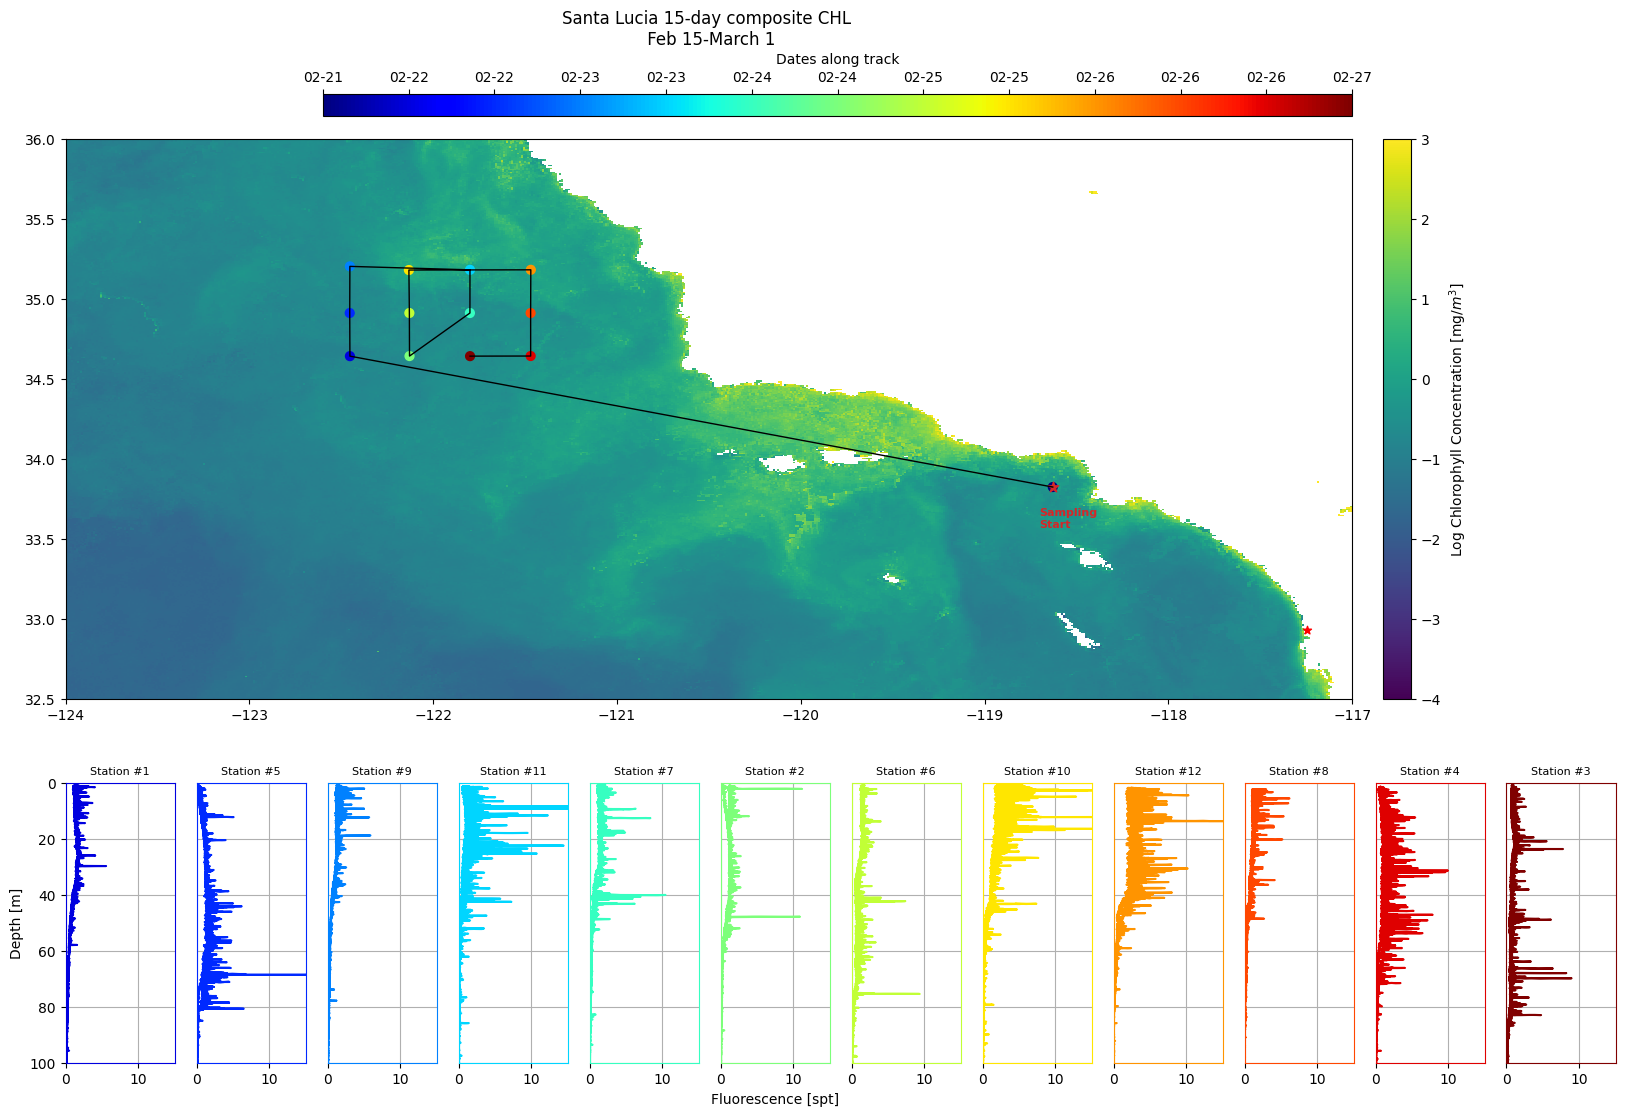

In [98]:
import matplotlib.gridspec as gridspec

# set bounds
xmin, xmax = -124, -117
ymin, ymax = 32.5, 36
sdlonlat = [-117.24556, 32.928333]
chl_extent = [-4,3]

fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.2)

# top plot: CHL map
ax_map = fig.add_subplot(gs[0])
mesh = ax_map.pcolormesh(lon, lat, logchl, vmin=chl_extent[0], vmax=chl_extent[1])
ax_map.set_title(title)
ax_map.set_xlim([xmin,xmax])
ax_map.set_ylim([ymin,ymax])

cbar = fig.colorbar(mesh, ax=ax_map, orientation='vertical', pad=0.02)
cbar.set_label(r'Log Chlorophyll Concentration [mg/$m^3$]')
ax_map.plot(slons, slats, linewidth=1, label='Ship Track', color='k')
traj = ax_map.scatter(slons, slats, c=np.arange(NN), s=40, linewidth=1, cmap='jet')
ax_map.scatter(slons[0], slats[0], c='tab:red', marker='*', s=60)
ax_map.annotate('Sampling\nStart', (slons[0]-0.075, slats[0]-0.25), color='tab:red', fontsize=8, fontweight='bold')
ax_map.scatter(sdlonlat[0], sdlonlat[1], color="red", marker="*", label="SD")



# trajectory colorbar
cax1 = ax_map.inset_axes([0.2, 1.04, 0.8, 0.04]) # [left, bottom, width, height]
trajcbar = fig.colorbar(traj, cax=cax1,orientation='horizontal')
cax1.tick_params(axis='both',which='both',right=True,left=False,labelright=True)
cax1.xaxis.set_ticks_position('top'); cax1.xaxis.set_label_position('top') 
dates = [dt.datetime.strftime(d,'%m-%d') for d in sdates]
cax1.xaxis.set_ticks(numstops,labels=dates)
trajcbar.set_label('Dates along track',labelpad=5,fontsize=10)


# bottom row: 12 vertical profile plots
gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 12, subplot_spec=gs[1])
var_cmap = mpl.cm.jet
var_colors = var_cmap(np.linspace(0, 1, 13))
ymin = 100

for ii, istat in enumerate(stations[1:]):
    ax = fig.add_subplot(gs_bottom[ii])
    p_atstat = survey_data[ii+1, 2, :]
    c_atstat = survey_data[ii+1, 6, :]
    ax.plot(c_atstat, p_atstat, label=f'Station {istat}', color=var_colors[ii+1])
    ax.set_ylim([ymin, 0])
    ax.set_xlim([0, 15])
    if ii == 5:
        ax.set_xlabel('Fluorescence [spt]')
    if ii == 0:
        ax.set_ylabel('Depth [m]')
    else:
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax.grid(True)
    ax.set_title(f'Station #{station_names[ii]}', fontsize=8)
    for spine in ax.spines.values():
        spine.set_edgecolor(var_colors[ii+1])

plt.show()


In [92]:
pwd

'/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia'

In [100]:
fig.savefig('/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/oceancolor_chl_surface.png',dpi=300,bbox_inches='tight')
# plt.savefig('chl_fluoro_combined.png', dpi=300, bbox_inches='tight')


In [ ]:
# chl / fluoro 
fig,axes = plt.subplots(1,12,figsize=(20,4))

ymin = 100
var_cmap = mpl.cm.Greens
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    ax = axes[ii]
    p_atstat = survey_data[istat,2,:]
    c_atstat = survey_data[istat,6,:]
    ax.plot(c_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.025
    ax.set_ylim([ymin,0]);
    if ii == 5: 
        ax.set_xlabel('Fluorescence [spt]')
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)
plt.show()

#save_loc = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/'
#fig.savefig(save_loc+'chl_stations_visualize_DCM_random.png',dpi=300)



{'Chl-a,  2025, 01/31 - 02/04': (('fakeDim0', 'fakeDim1'), (444, 480), 20, 0)}


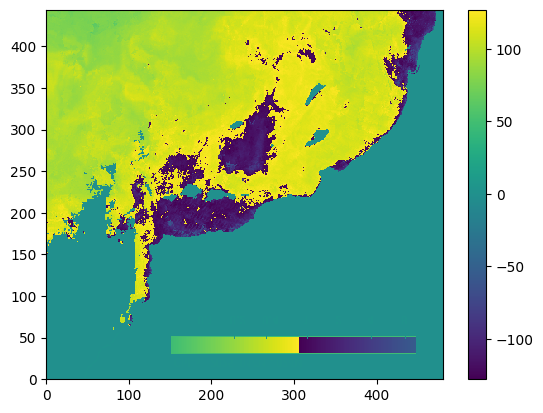

In [12]:
# already processed files from mati 

hf = phs.SD(filename, phs.SDC.READ)

variables = hf.datasets()
print(variables)
chl_name = list(variables.keys())[0]

chl_data = hf.select(chl_name) 
chl = chl_data[:,:]
chl.shape

plt.figure()
plt.pcolormesh(chl)
plt.colorbar()
plt.show()

# questions for mati: 
1) what are the units of chl? 

2) what is the nomenclature of the files he sent me? 

## Accessing NASA Ocean color files from shared drive 

In [ ]:
# sort the files by date 

path = '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/SAT/L3m_CHL_NRT_StLucia/' # change to path to scienceshare on your local computer 
path = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/data/L3m_CHL_NRT_StLucia/'
files = os.listdir(path)

# readable files: 
readable_files = []

for nc_file in files:
    try:
        with netCDF4.Dataset(path+nc_file, "r") as ds:
            readable_files.append(nc_file)
    except OSError as e:
        if "HDF error" in str(e):
            print(f"Skipping {nc_file} due to HDF error.")
        else:
            print(f"Skipping {nc_file} due to unexpected error: {e}")
    except Exception as e:
        print(f"Skipping {nc_file} due to general error: {e}")

# dates are sorted for these at characters 11:19 
sorted_files = sorted(readable_files, key=lambda x: x[11:19])



In [ ]:
## animate 

import matplotlib.animation as animation
import cartopy.crs as ccrs
import matplotlib.ticker as mticker


# select for only the desired timestep satellite grabs 

daily9km_files = [f for f in sorted_files if fnmatch.fnmatch(f, '*DAY*9km*.nc')]
daily4km_files = [f for f in sorted_files if fnmatch.fnmatch(f, '*DAY*4km*.nc')]
comp8d_files = [f for f in sorted_files if fnmatch.fnmatch(f, '*8D*9km*.nc')]


# now perform for each day satellite file that i have 

# set bounds
xmin, xmax = -124, -117
ymin, ymax = 32, 36
sdlonlat = [-117.24556, 32.928333]
chl_extent = [0, 3]

# loop through all valid files
chl_data = []
titles = []
lon, lat = None, None  

res = '4km' # 9 or 4 km 
for ff in daily4km_files[-1]:
    dataset = xr.open_dataset(path+ff)
    chl = dataset["chlor_a"]
    if lon is None or lat is None:
        lon, lat = np.meshgrid(dataset["lon"], dataset["lat"])
    chl_data.append(chl.values)
    given_date = datetime.strptime(dataset.attrs.get("product_name", ff)[11:19], "%Y%m%d")
    titles.append(f'Daily {res} on {given_date.strftime("%Y-%m-%d")}')  

# check if we loaded data
if not chl_data:
    raise ValueError("No valid chlorophyll data found.")


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
crs_data = ccrs.PlateCarree()

# create empty plot for animation 
mesh = ax.pcolormesh(lon, lat, chl_data[0], cmap="jet", vmin=chl_extent[0], vmax=chl_extent[1], transform=crs_data)
# log scale plot: 
# change mins: 
#chl_extent = [1e-2, 3]
#mesh = ax.pcolormesh(lon,lat,chl_data[0],cmap='jet',transform=crs_data,norm=mcolors.LogNorm(vmin=chl_extent[0],vmax=chl_extent[1]) )
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label(r'Chlorophyll Concentration [mg/$m^3$]')

ax.set_extent((xmin, xmax, ymin, ymax))
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color="gray", alpha=0.2, linestyle="-")
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.MultipleLocator(1)
gl.ylocator = mticker.MultipleLocator(1)

# reference SD 
ax.scatter(sdlonlat[0], sdlonlat[1], color="red", marker="*", label="SD")
title = ax.set_title(titles[0])

# update animation via function
def update(frame):
    mesh.set_array(chl_data[frame].ravel())  # update pcolormesh data
    title.set_text(titles[frame])  # update title
    return mesh, title

ani = animation.FuncAnimation(fig, update, frames=len(chl_data), interval=500, blit=False)
plt.show()

# save as GIF
#save_loc = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/at_sea/'
#ani.save(save_loc+'santalucia_daily_aquamodis_'+res+'.gif', writer="pillow", fps=1)

# save as MP4 - not currently loaded correctly
# ani.save("chlorophyll_animation.mp4", writer="ffmpeg", fps=5)




In [ ]:
comp8d9km_files = [f for f in sorted_files if fnmatch.fnmatch(f, '*8D*9km*.nc')][0]



In [ ]:
comp8d9km_files = [f for f in sorted_files if fnmatch.fnmatch(f, '*8D*.nc')]

comp8d9km_files

In [ ]:
comp8d9km_files = [f for f in sorted_files if fnmatch.fnmatch(f, '*8D*9km*.nc')]
dataset = xr.open_dataset(path+ff) 
chl = dataset["chlor_a"]
clon, clat = np.meshgrid(dataset["lon"], dataset["lat"])
chl_extent = [1e-1,50]

crs_proj = cartopy.crs.Robinson()
crs_data = cartopy.crs.PlateCarree()

# loop through each 8day composite 

# set bounds
xmin, xmax = -124, -117
ymin, ymax = 32, 36
sdlonlat = [-117.24556, 32.928333]
chl_extent = [1e-1,50]


for ff in comp8d9km_files: 
    dataset = xr.open_dataset(path+ff) 
    chl = dataset["chlor_a"]
    clon, clat = np.meshgrid(dataset["lon"], dataset["lat"])
       
    crs_proj = cartopy.crs.Robinson()
    crs_data = cartopy.crs.PlateCarree()
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(projection=crs_proj)
    # mesh = ax.pcolormesh(lon, lat, chl, cmap="jet", transform=crs_data) #, vmin=chl_extent[0], vmax=chl_extent[1])
    mesh = ax.pcolormesh(clon,clat,chl,cmap='jet',transform=crs_data,norm=mcolors.LogNorm(vmin=chl_extent[0],vmax=chl_extent[1]) )

    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
    cbar.set_label(r'Chlorophyll Concentration [mg/$m^3$]')
    ax.set_extent((xmin,xmax,ymin,ymax))
    ax.coastlines()
    gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,linewidth=.5, color='gray', alpha=0.2, linestyle='-')  
    gl.top_labels = False; gl.right_labels = False 
    gl.xlocator = mticker.MultipleLocator(1) 
    gl.ylocator = mticker.MultipleLocator(1) 
    d0 = datetime.strptime(dataset.attrs.get("product_name", ff)[11:19], "%Y%m%d")
    d1 = datetime.strptime(dataset.attrs.get("product_name", ff)[20:28], "%Y%m%d")
    ax.set_title(f'8 Day Composite @ 9km for {d0.strftime("%m/%d")} - {d1.strftime("%m/%d")}')
    plt.show()



In [ ]:
# nice! next we will access the ship data in order to get ship location as we go 

### Access ship data from cruise drive


In [ ]:
# location of cruise folder on my local computer 
shipinfo = '/home/vboatwright/mnt/cruise/SR2503/metacq/data/'

seadates = [dt.datetime(2025,2,19),dt.datetime(2025,2,20),dt.datetime(2025,2,21),dt.datetime(2025,2,22),dt.datetime(2025,2,23),dt.datetime(2025,2,24),dt.datetime(2025,2,25)]
longdays = [sd.strftime("%Y%m%d") for sd in seadates]
days = [sd.strftime("%y%m%d") for sd in seadates]
time = [int(dd) for dd in longdays]

NN = len(days) 
slons = []
slats = []

for ii in np.arange(0,NN): 
    shipdata = np.loadtxt(shipinfo+days[ii]+'.MET',usecols=(0,24,25))
    if shipdata[1,2]>0 or shipdata[1,2]<-100:
        shipdata=np.loadtxt(shipinfo+days[ii]+'.MET',usecols=(0,24,25))
    metatime=min(shipdata[:,0], key=lambda x:abs(x-time[ii]))
    subset=shipdata[shipdata[:,0]==metatime,:]
    lat,lon=subset[0,1:3]
    slons.append(lon)
    slats.append(lat)



In [ ]:
seadates

In [ ]:

fig = plt.figure(figsize=(10,5), layout="constrained")
numdays = NN 
numday = np.arange(0,NN)
spec = fig.add_gridspec(2,numdays)

cmaps = ['RdBu_r', 'viridis']

# set bounds
xmin, xmax = -124, -117
ymin, ymax = 32, 36
sdlonlat = [-117.24556, 32.928333]

comp8d9km_file = [f for f in sorted_files if fnmatch.fnmatch(f, '*8D*9km*.nc')][-1]
dataset = xr.open_dataset(path+comp8d9km_file) 
chl = dataset["chlor_a"]
clon, clat = np.meshgrid(dataset["lon"], dataset["lat"])
chl_extent = [1e-1,50]

crs_proj = cartopy.crs.Robinson()
crs_data = cartopy.crs.PlateCarree()

# consolidate top row for 8day composite map 
ax0 = fig.add_subplot(spec[0, :],projection=crs_proj)

# mesh = ax.pcolormesh(lon, lat, chl, cmap="jet", transform=crs_data) #, vmin=chl_extent[0], vmax=chl_extent[1])
mesh = ax0.pcolormesh(clon,clat,chl,cmap='jet',transform=crs_data,norm=mcolors.LogNorm(vmin=chl_extent[0],vmax=chl_extent[1]) )

cax0 = ax0.inset_axes([1.02, 0.1, 0.05, 0.85]) # [left, bottom, width, height]
chlcbar = fig.colorbar(mesh, cax=cax0,orientation='vertical')
chlcbar.set_label(r'Chlorophyll Concentration [mg/$m^3$]')
ax0.set_extent((xmin,xmax,ymin,ymax))
ax0.coastlines()

gl = ax0.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,linewidth=.5, color='gray', alpha=0.2, linestyle='-')  
gl.top_labels = False; gl.right_labels = False 
gl.xlocator = mticker.MultipleLocator(1) 
gl.ylocator = mticker.MultipleLocator(1) 

d0 = datetime.strptime(dataset.attrs.get("product_name", comp8d9km_file)[11:19], "%Y%m%d")
d1 = datetime.strptime(dataset.attrs.get("product_name", comp8d9km_file)[20:28], "%Y%m%d")
ax0.set_title(f'8 Day Composite @ 9km for {d0.strftime("%m/%d")} - {d1.strftime("%m/%d")}')

# add ship trajectory
numdays = np.arange(0,NN)
j = ax0.plot(slons,slats,linewidth=1,label='Ship Track',color='k',transform=crs_data)
traj = ax0.scatter(slons,slats,c=numdays,s=40,linewidth=1,transform=crs_data,cmap='hsv')

j1 = ax0.scatter(slons[0],slats[0],c='tab:red',marker='*',s=60,transform=crs_data)
ax0.annotate('Cruise\nStart',(slons[0]-0.075,slats[0]-0.25),color='tab:red',fontsize=8,fontweight='bold')


# trajectory colorbar
cax1 = ax0.inset_axes([0.4, 1.04, 0.8, 0.04]) # [left, bottom, width, height]
trajcbar = fig.colorbar(traj, cax=cax1,orientation='horizontal')
cax1.tick_params(axis='both',which='both',right=True,left=False,labelright=True)
cax1.xaxis.set_ticks_position('top'); cax1.xaxis.set_label_position('top') 
dates = [dt.datetime.strftime(d,'%m-%d') for d in seadates]
cax1.xaxis.set_ticks(numdays,labels=dates)
trajcbar.set_label('Dates along track',labelpad=5,fontsize=10)

chl_extent = [0, 3]

# make this automattically detect available files and only plot that number of subplots

for ii in np.arange(0,NN) : 
    ax1 = fig.add_subplot(spec[1,ii],projection=crs_proj)
    datenum = seadates[ii].strftime("%Y%m%d")
    day9kmfile = [f for f in sorted_files if fnmatch.fnmatch(f, f'*{datenum}*DAY*9km*.nc')][0]
    day4kmfile = [f for f in sorted_files if fnmatch.fnmatch(f, f'*{datenum}*DAY*4km*.nc')][0]
    res = '4km'
    file = day4kmfile
    dataset = xr.open_dataset(path+day4kmfile)
    chl = dataset["chlor_a"].values
    clon, clat = np.meshgrid(dataset["lon"], dataset["lat"])
    title = f'Daily {res} \n on {seadates[ii].strftime("%Y-%m-%d")}'
    dayplot = ax1.pcolormesh(clon, clat, chl, cmap="jet", vmin=chl_extent[0], vmax=chl_extent[1], transform=crs_data)

    ax1.set_extent((xmin, xmax, ymin, ymax))
    ax1.coastlines()
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color="gray", alpha=0.2, linestyle="-")
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.MultipleLocator(1)
    gl.ylocator = mticker.MultipleLocator(1)
    
    # reference ship  
    ax1.scatter(slons[ii], slats[ii], color="red", marker="*", s=100, transform=crs_data)
    ax1.set_title(title)

    if ii == NN : 
        # add colorbar for all plots 
        cax = ax1.inset_axes([0.1, -0.1, 0.65, 0.05]) # [left, bottom, width, height]
        chlcbar = fig.colorbar(dayplot, cax=cax,orientation='horizontal')
        chlcbar.set_label(r'Chlorophyll Concentration \n [mg/m^3]')
        

plt.show()

In [ ]:
import matplotlib.gridspec as gridspec

# use most recent saved chl map and ship track 
# inset the daily chl from sat at bottom 

dataset = xr.open_dataset(path+ff) 
chl = dataset["chlor_a"]
clon, clat = np.meshgrid(dataset["lon"], dataset["lat"])

crs_proj = cartopy.crs.Robinson()
crs_data = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(1,2,width_ratios=[15,1],wspace=0.1)
ax = fig.add_subplot(gs[0],projection=crs_proj)

# mesh = ax.pcolormesh(lon, lat, chl, cmap="jet", transform=crs_data) #, vmin=chl_extent[0], vmax=chl_extent[1])
mesh = ax.pcolormesh(clon,clat,chl,cmap='jet',transform=crs_data,norm=mcolors.LogNorm(vmin=chl_extent[0],vmax=chl_extent[1]) )

cbar_ax = fig.add_subplot(gs[1])
cbar = plt.colorbar(mesh, ax=cbar_ax, orientation='vertical') #, fraction=0.046, pad=0.02)
cbar.set_label(r'Chlorophyll Concentration [mg/$m^3$]')
ax.set_extent((xmin,xmax,ymin,ymax))
ax.coastlines()

gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,linewidth=.5, color='gray', alpha=0.2, linestyle='-')  
gl.top_labels = False; gl.right_labels = False 
gl.xlocator = mticker.MultipleLocator(1) 
gl.ylocator = mticker.MultipleLocator(1) 

d0 = datetime.strptime(dataset.attrs.get("product_name", ff)[11:19], "%Y%m%d")
d1 = datetime.strptime(dataset.attrs.get("product_name", ff)[20:28], "%Y%m%d")
ax.set_title(f'8 Day Composite @ 9km for {d0.strftime("%m/%d")} - {d1.strftime("%m/%d")}')

# add ship trajectory
numdays = np.arange(0,NN)
j = ax.plot(slons,slats,linewidth=1,label='Ship Track',color='k',transform=crs_data)
k = ax.scatter(slons,slats,c=numdays,s=4,linewidth=1,transform=crs_data)

j1 = ax.scatter(slons[0],slats[0],c='tab:red',marker='*',s=60,transform=crs_data)
ax.annotate('Cruise\nStart',(slons[0]-0.075,slats[0]-0.25),color='tab:red',fontsize=8,fontweight='bold')

# plt.legend()

# add colorbars for plot to show time of trajectory

'''
cax = fig.add_axes([0.825,0.075,0.015,0.4]) # [left, bottom, width, height]
timerange = np.linspace(ts[0],ts[-1],8)
dates = [datetime.datetime.utcfromtimestamp(d) for d in timerange]
dates = [datetime.datetime.strftime(d,'%m-%d') for d in dates]
cbar = plt.colorbar(j,cax=cax,orientation='vertical',ticks=numdays) 
cax.tick_params(axis='both',which='both',left=False,right=True,labelright=False)
'''

# cax = fig.add_axes([0.845,0.075,0.015,0.4]) # [left, bottom, width, height]
cax2 = fig.add_axes([0.6, 0.15, 0.02, 0.7])  
dates = [dt.datetime.strftime(d,'%m-%d') for d in seadates]
cbar = plt.colorbar(k,cax=cax2,orientation='horizontal')
cax2.yaxis.set_ticks(numdays,labels=dates)
cax2.tick_params(axis='both',which='both',right=True,left=False,labelright=True)
cbar.set_label('Dates along track',labelpad=10,fontsize=10)
#cax.xaxis.set_ticks_position('top') 
#cax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


plt.show()



In [ ]:
fig = plt.figure(figsize=(10,5), layout="constrained")
numdays = NN 
numday = np.arange(0,NN)
spec = fig.add_gridspec(2,numdays)

cmaps = ['RdBu_r', 'viridis']

# consolidate top row 
ax0 = fig.add_subplot(spec[0, :])
pcm = ax0.pcolormesh(np.random.random((20, 20)) * (col + 1),cmap=cmaps[1])
traj = ax0.scatter([0,1,2,3],[10,10,10,10],c=numday,s=4,linewidth=1)
# chl colorbar 
cax0 = ax0.inset_axes([1.02, 0.1, 0.05, 0.8]) # [left, bottom, width, height]
chlcbar = fig.colorbar(pcm, cax=cax0,orientation='vertical')
# trajectory colorbar
cax1 = ax0.inset_axes([0.8, 1.02, 0.21, 0.05]) # [left, bottom, width, height]
trajcbar = fig.colorbar(traj, cax=cax1,orientation='horizontal')
cax1.tick_params(axis='both',which='both',right=True,left=False,labelright=True)
cax1.xaxis.set_ticks_position('top'); cax1.xaxis.set_label_position('top') 
trajcbar.set_label('Dates along track',labelpad=5,fontsize=10)


for ii in np.arange(0,numdays) : 
    ax = fig.add_subplot(spec[1,ii])
    
fig.suptitle('Manually added subplots, spanning a column')

In [ ]:
[f for f in sorted_files if fnmatch.fnmatch(f, '*20250220*DAY*9km*.nc')]

In [ ]:
day9kmfile = [f for f in sorted_files if fnmatch.fnmatch(f, f'*{datenum}*DAY*9km*.nc')]
day9kmfile

In [ ]:

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)



In [ ]:
fig, axs = plt.subplots(3, 3, layout='constrained')
for ax in axs.flat:
    pcm = ax.pcolormesh(np.random.random((20, 20)))

fig.colorbar(pcm, ax=axs[0, :2], shrink=0.6, location='bottom')
fig.colorbar(pcm, ax=[axs[0, 2]], location='bottom')
fig.colorbar(pcm, ax=axs[1:, :], location='right', shrink=0.6)
fig.colorbar(pcm, ax=[axs[2, 1]], location='left')

In [ ]:
numdays = NN 

fig, axs = plt.subplots(2, numdays, layout='constrained')
gs = axs[0, 2].get_gridspec()
# remove top axes to aggregate into 1 subplot for map 


cmaps = ['RdBu_r', 'viridis']

for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            cax = ax.inset_axes([1.04, 0.2, 0.05, 0.6])
            fig.colorbar(pcm, cax=cax)

In [ ]:
fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('lightblue')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')
